## This is a file for investigating the constraints regarding the fleet renewal.

To run this file, you first have to run the main.py file, with the extract model function.

In [7]:
import pickle
import pyomo.environ as pyo
import pandas as pd
from matplotlib import pyplot as plt
import chardet



## Loading the model from disk

In [11]:
filename = 'FuelScen_carbontaxbase_SP.pickle'
pathname = "Data//solved_model//" + filename



model = pickle.load(open(pathname, 'rb'))
base_data = pickle.load(open("Data//Output//FuelScen_carbontaxbase_basedata.pickle", 'rb'))

In [12]:
constraints_to_investigate = [model.FleetRenewal, model.DecreaseModeTotalTransportAmount, model.TechMaturityLimit, model.BassDiffusionFirstStage, model.BassDiffusionSecondStage]

   Constraint FleetRenewal


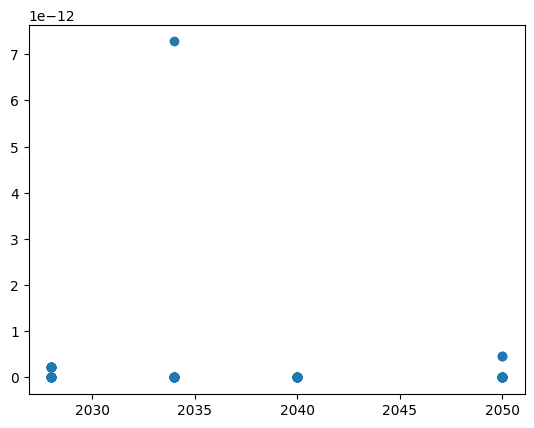

   Constraint DecreaseModeTotalTransportAmount


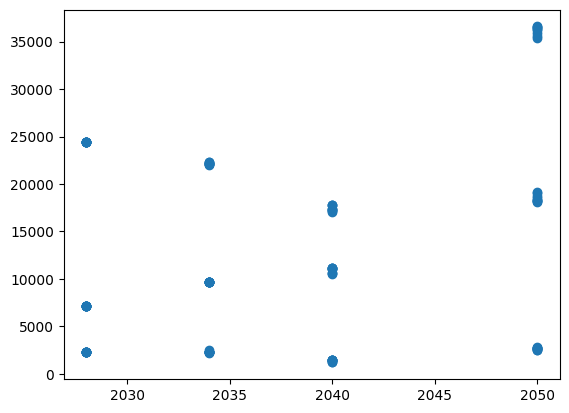

   Constraint TechMaturityLimit


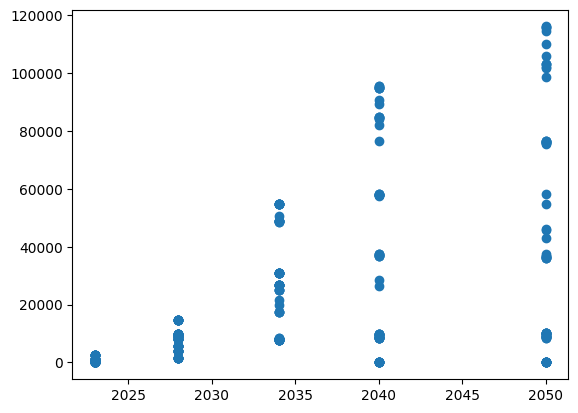

   Constraint BassDiffusionFirstStage


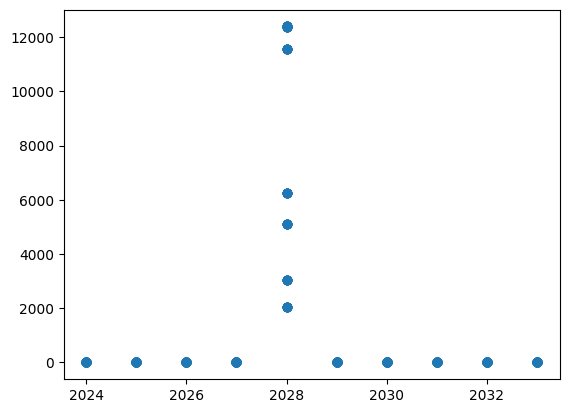

   Constraint BassDiffusionSecondStage


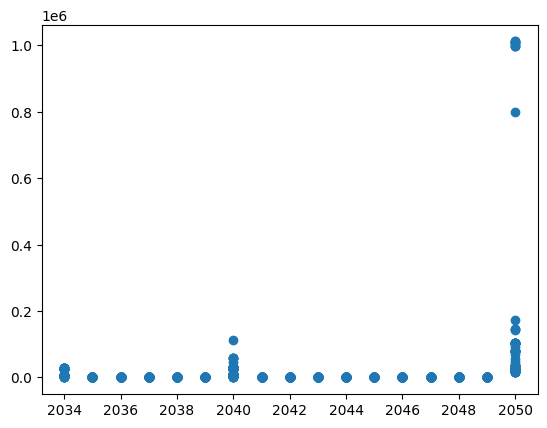

In [13]:


Zero_list = []
total_list = []
i=0

years = [2023, 2028, 2024, 2040, 2050]
for c in constraints_to_investigate:
    
    
    if c in constraints_to_investigate:
        
        uslack = [] 
        indexes = []
        
        print("   Constraint", c)
        zeros = 0
        total = 0
        i+=1
        for index in c:
            if i <= 2:
                (m, t, s) = index
            else:
                (m, f, t, s) = index
            
            if t not in years:
                pass
            
            if abs(pyo.value(c[index])) <= 0.001:
                zeros += 1
            total += 1
            #print("      ", index,  '  lslack:', c[index].lslack(),  '  uslack:',c[index].uslack(), '   value:', pyo.value(c[index]))
            
            uslack.append(abs(pyo.value(c[index])))
            indexes.append(t)
        
        
        plt.scatter(indexes, uslack)
        plt.show()
        
        Zero_list.append(zeros)
        total_list.append(total)

In [14]:
Zero_list = []
total_list = []
i=0

years = [2023, 2028, 2024, 2040, 2050]
for c in constraints_to_investigate:
    
    
    if c in constraints_to_investigate:
        
        uslack = [] 
        indexes = []
        
        print("   Constraint", c)
        zeros = 0
        total = 0
        i+=1
        for index in c:
            if i <= 2:
                (m, t, s) = index
            else:
                (m, f, t, s) = index
            
            if t not in years:
                pass
            
            if abs(pyo.value(c[index])) == 0:
                zeros += 1
            total += 1
            #print("      ", index,  '  lslack:', c[index].lslack(),  '  uslack:',c[index].uslack(), '   value:', pyo.value(c[index]))
            
            uslack.append(abs(pyo.value(c[index])))
            indexes.append(t)
        
    
        
        Zero_list.append(zeros)
        total_list.append(total)

   Constraint FleetRenewal
   Constraint DecreaseModeTotalTransportAmount
   Constraint TechMaturityLimit
   Constraint BassDiffusionFirstStage
   Constraint BassDiffusionSecondStage


In [15]:
print(Zero_list)
print(total_list)


for i in range(len(Zero_list)):
    print(Zero_list[i]/total_list[i])

[96, 0, 50, 279, 216]
[108, 108, 315, 630, 1071]
0.8888888888888888
0.0
0.15873015873015872
0.44285714285714284
0.20168067226890757


In [16]:
#create a dataframe to store the values of the constraint_df in the model corresponding to the constraints in the constraints_to_investigate list
constraint_df = pd.DataFrame(columns = ['constraint','Mode','Fuel','Year','Scenario','Value','Uslack','Active'])

for c in constraints_to_investigate:
    for index in c:
            if len(index) == 3:
                (Mode, Year, Scenario) = index
                Fuel = None
            else:
                (Mode, Fuel, Year, Scenario) = index
                
            constraint = str(c)
            
            value = pyo.value(c[index])
            
            uslack = c[index].uslack()
            
            if value == 0:
                active = True
            else:
                active = False
            
            a_series = pd.Series([constraint,Mode,Fuel,Year,Scenario,value,uslack, active], index=constraint_df.columns)
            constraint_df = pd.concat([constraint_df, a_series.to_frame().T],axis=0, ignore_index=True)

In [17]:
#filter away all rows where the year is not in the years list
years = [2023, 2028, 2034, 2040, 2050]

constraint_df = constraint_df[constraint_df.Year.isin(years)]


In [18]:
#For each unique value in the constraint column of constraint_df, cont the number of times the constraint is active
#and the number of times it is not active
constraint_names = constraint_df.constraint.unique()

for c in constraint_names:
    print(c)
    print(constraint_df[constraint_df.constraint == c].Active.value_counts())


FleetRenewal
True     96
False    12
Name: Active, dtype: int64
DecreaseModeTotalTransportAmount
False    108
Name: Active, dtype: int64
TechMaturityLimit
False    265
True      50
Name: Active, dtype: int64
BassDiffusionFirstStage
False    63
Name: Active, dtype: int64
BassDiffusionSecondStage
False    182
True       7
Name: Active, dtype: int64


In [19]:
#filter only the yeras 2023, 2028
constraint_first_df = constraint_df[constraint_df.Year.isin([2023, 2028])]

#the other yeras
constraint_second_df = constraint_df[constraint_df.Year.isin([2034, 2040, 2050])]

In [20]:
print('first stage constraints')

constraint_names = constraint_first_df.constraint.unique()
for c in constraint_names:
    print(c)
    print(constraint_first_df[constraint_first_df.constraint == c].Active.value_counts())

first stage constraints
FleetRenewal
True     18
False     9
Name: Active, dtype: int64
DecreaseModeTotalTransportAmount
False    27
Name: Active, dtype: int64
TechMaturityLimit
False    90
True     36
Name: Active, dtype: int64
BassDiffusionFirstStage
False    63
Name: Active, dtype: int64


In [21]:
print('second stage constraints')

constraint_names = constraint_second_df.constraint.unique()
for c in constraint_names:
    print(c)
    print(constraint_second_df[constraint_second_df.constraint == c].Active.value_counts())

second stage constraints
FleetRenewal
True     78
False     3
Name: Active, dtype: int64
DecreaseModeTotalTransportAmount
False    81
Name: Active, dtype: int64
TechMaturityLimit
False    175
True      14
Name: Active, dtype: int64
BassDiffusionSecondStage
False    182
True       7
Name: Active, dtype: int64


In [22]:
base_data.LIFETIME

{'Road': 8, 'Rail': 30, 'Sea': 25}